In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
# light below
# aerobic 160 bpm
# anaerobic 175 bpm

# load data
df = pd.read_csv('./data/project_data.csv')
df.head()

,s,Type of Exercise,Duration of Exercise,Intensity,Heartrate,Time of Day of Exercise,Sleep Quality (out of 10),Sleep Time
0,2/7,Arms and Shoulders,2 hr 0 min,Moderate,150.0,7:00 PM,6.50,7 hr 45 min
1,2/8,Legs,1 hr 15 min,Intense,184.0,1:00 PM,8.00,9 hrs 0 min
2,2/9,Running,0 hr 25 min,Intense,190.0,6:00 PM,7.00,7 hrs 0 min
3,2/10,Rest,NaN,NaN,NaN,NaN,7.00,7 hrs 15 min
4,2/11,Chest and Back,1 hr 30 min,Moderate,143.0,5:00 PM,5.75,7 hr 20 min


Correlation Matrix:
                           Heartrate  Sleep Quality (out of 10)  \
Heartrate                   1.000000                   0.544968   
Sleep Quality (out of 10)   0.544968                   1.000000   
Sleep Time (Hours)         -0.038324                   0.180651   

                           Sleep Time (Hours)  
Heartrate                           -0.038324  
Sleep Quality (out of 10)            0.180651  
Sleep Time (Hours)                   1.000000  


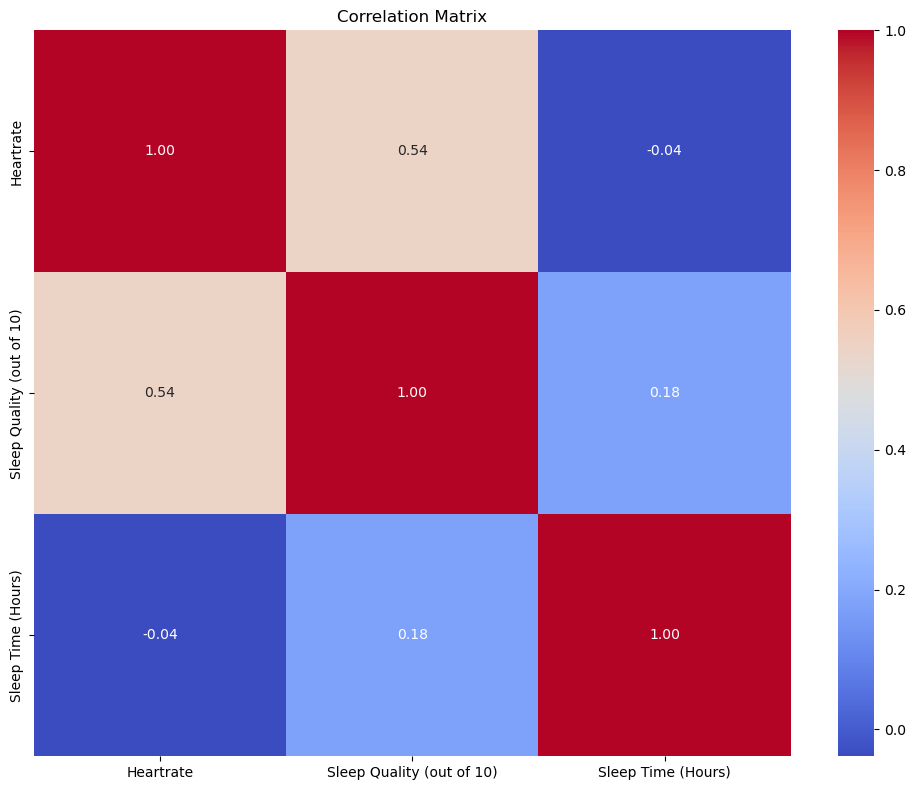

In [10]:
# Function to convert time in the format 'X hr Y min' to numerical value in hours
def time_to_hours(time):
    time_parts = time.split(' ')
    if len(time_parts) == 4:  # Format like "7 hr 45 min"
        hours = int(time_parts[0])
        minutes = int(time_parts[2])
        total_hours = hours + minutes / 60
        return total_hours
    elif len(time_parts) == 3 and time_parts[1] == 'hrs':  # Format like "9 hrs 0 min"
        hours = int(time_parts[0])
        minutes = int(time_parts[2])
        total_hours = hours + minutes / 60
        return total_hours
    elif len(time_parts) == 3 and time_parts[1] == 'hr':  # Format like "5 hr 0 min"
        hours = int(time_parts[0])
        minutes = int(time_parts[2])
        total_hours = hours + minutes / 60
        return total_hours
    elif len(time_parts) == 2 and time_parts[1].startswith('hr'):  # Format like "8hr 0 min"
        try:
            hours = int(time_parts[0])
            return hours
        except:
            return 0
    else:
        return 0

# Create a new DataFrame with only the columns we need
features_df = df[['Heartrate', 'Sleep Quality (out of 10)', 'Sleep Time']].dropna()

# Convert sleep time to hours
features_df['Sleep Time (Hours)'] = features_df['Sleep Time'].apply(time_to_hours)

# Drop the original Sleep Time column
features_df = features_df.drop(columns=['Sleep Time'])

# Calculate the correlation matrix
corr_matrix_new = features_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix_new)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_new, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


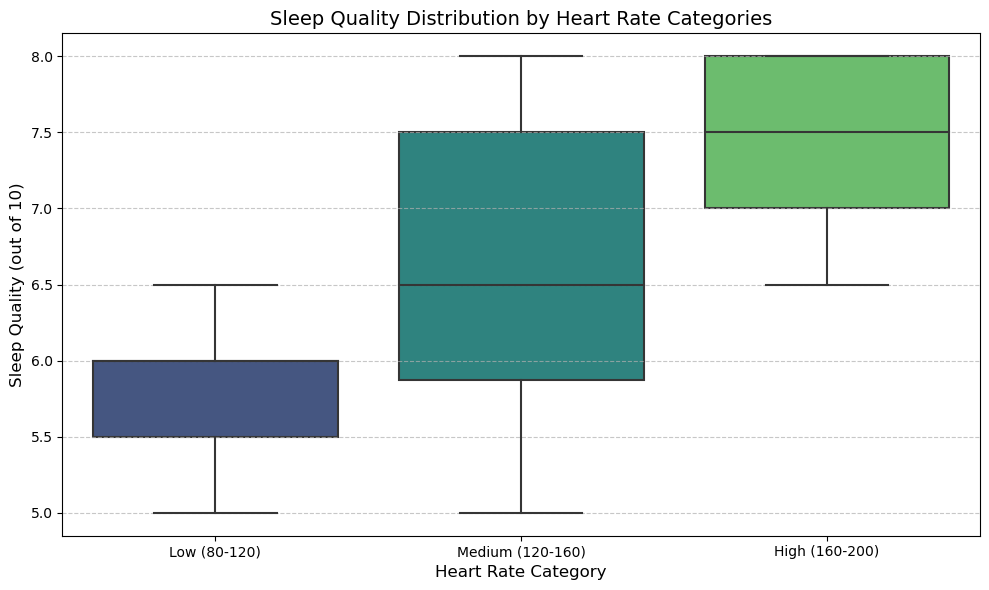

Average Sleep Quality by Heart Rate Category:
HR_Category
Low (80-120)        5.826923
Medium (120-160)    6.592105
High (160-200)      7.423077
Name: Sleep Quality (out of 10), dtype: float64


In [13]:
# Create heart rate categories
bins = [80, 120, 160, 200]
labels = ['Low (80-120)', 'Medium (120-160)', 'High (160-200)']
features_df['HR_Category'] = pd.cut(features_df['Heartrate'], bins=bins, labels=labels)

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='HR_Category', y='Sleep Quality (out of 10)', data=features_df, palette='viridis')
plt.title('Sleep Quality Distribution by Heart Rate Categories', fontsize=14)
plt.xlabel('Heart Rate Category', fontsize=12)
plt.ylabel('Sleep Quality (out of 10)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display mean sleep quality for each heart rate category
category_means = features_df.groupby('HR_Category')['Sleep Quality (out of 10)'].mean()
print("Average Sleep Quality by Heart Rate Category:")
print(category_means)

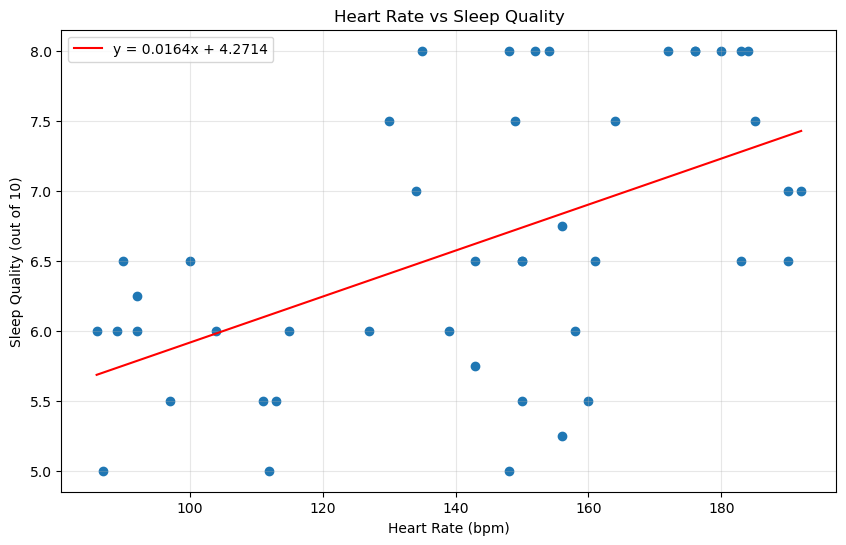

Linear Regression Results:
Slope: 0.0164
Intercept: 4.2714
R-value: 0.5450
P-value: 0.000109
Std Error: 0.0039

Conclusion:
With a p-value of 0.000109 < 0.05, we reject the null hypothesis.
There is a statistically significant relationship between heart rate and sleep quality.
The positive slope (0.0164) indicates higher heart rates are associated with better sleep quality.
The R-squared value of 0.2970 indicates that 29.70% of the variation in sleep quality can be explained by heart rate.


In [20]:
from scipy import stats

# Conduct hypothesis testing to determine if heart rate affects sleep quality

# 1. Formulate the hypotheses
# H0: Heart rate has no significant effect on sleep quality
# H1: Heart rate has a significant effect on sleep quality

# 2. Check the relationship visually
plt.figure(figsize=(10, 6))
plt.scatter(features_df['Heartrate'], features_df['Sleep Quality (out of 10)'])
plt.title('Heart Rate vs Sleep Quality')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Sleep Quality (out of 10)')

# Add regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(
    features_df['Heartrate'], 
    features_df['Sleep Quality (out of 10)']
)
x_pred = np.linspace(min(features_df['Heartrate']), max(features_df['Heartrate']), 100)
y_pred = slope * x_pred + intercept
plt.plot(x_pred, y_pred, 'r-', label=f'y = {slope:.4f}x + {intercept:.4f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 3. Perform statistical test
# Linear regression test
result = stats.linregress(features_df['Heartrate'], features_df['Sleep Quality (out of 10)'])
print(f"Linear Regression Results:")
print(f"Slope: {result.slope:.4f}")
print(f"Intercept: {result.intercept:.4f}")
print(f"R-value: {result.rvalue:.4f}")
print(f"P-value: {result.pvalue:.6f}")
print(f"Std Error: {result.stderr:.4f}")


# 4. Draw conclusions
alpha = 0.05
print("\nConclusion:")
if result.pvalue < alpha:
    print(f"With a p-value of {result.pvalue:.6f} < {alpha}, we reject the null hypothesis.")
    print("There is a statistically significant relationship between heart rate and sleep quality.")
    
    if result.slope > 0:
        print(f"The positive slope ({result.slope:.4f}) indicates higher heart rates are associated with better sleep quality.")
    else:
        print(f"The negative slope ({result.slope:.4f}) indicates higher heart rates are associated with worse sleep quality.")
    
    print(f"The R-squared value of {result.rvalue**2:.4f} indicates that {result.rvalue**2*100:.2f}% of the variation in sleep quality can be explained by heart rate.")
else:
    print(f"With a p-value of {result.pvalue:.6f} > {alpha}, we fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude that heart rate affects sleep quality.")